In [1]:
import pickle
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from utils import PICKLE_RESULTS, get_files_from_dir_with_pathlib

In [2]:
import os
os.chdir('C:\\Users\\vgdilu\\Documents') # change to your working directory

In [3]:
def read_pickle(file_path:Path):
    with file_path.open('rb') as pickle_file:
        result_dict = pickle.load(pickle_file)
    return result_dict

In [4]:
# Plotting histogram
def probability_histogram(y_prob, y_label, index=None, save_path=None):
    """Plot the distribution of predicting probability

    :param y_prob: Predicting probability of the samples
    :type y_prob: torch.Tensor
    :param y_label: True label of the samples
    :type y_label: torch.Tensor
    """
    prob_speech = y_prob[np.where(y_label==1)]
    prob_no_speech = y_prob[np.where(y_label==0)]

    plt.figure()
    # Density curve
    sns.kdeplot(prob_speech, label="speech", color='blue', fill=True, clip=[0,1])
    sns.kdeplot(prob_no_speech, label="non-speech", color='orange', fill='True', clip=[0,1])
    
    plt.legend()
    plt.xlim([0,1])
    if index!=None:
        plt.title(index)
    if save_path!=None:
        plt.savefig(Path("plot", save_path), format='png', dpi=1200, bbox_inches='tight')

Reading RDAL+M results

Reading RDAL+M results...
Mean SEC accuracy for P = 70 is 0.77 with std 0.01 

Mean SD accuracy for P = 70 is 0.52 with std 0.01
Mean AUC score for P = 70 is 0.53 with std 0.02

Mean GD accuracy for P = 70 is 0.51 with std 0.02
Mean AUC score for GD for P = 70 is 0.52 with std 0.02



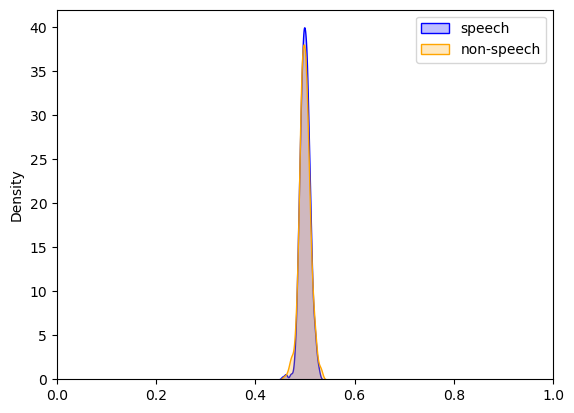

In [5]:
print("Reading RDAL+M results...")
training = "fixed_mask"
result_dir = Path(PICKLE_RESULTS, training)

P_VALUES = [70]

test_event_accuracy_result = {}
ver_acc_result = {}
ver_recall_result = {}

val_acc_result = {}
val_recall_result = {}
auc_scores = {}

gender_acc_result = {}
gender_auc_scores = {}


for pickle_path in get_files_from_dir_with_pathlib(result_dir):
    index = pickle_path.stem.split("_")[-1]
    if int(index) in range (740, 750):
        result_dict = read_pickle(pickle_path)
        P = result_dict["P"]
        test_event_accuracy = result_dict['test_event_accuracy']  
        ver_acc = result_dict['ver_acc'] 
        ver_recall = result_dict['ver_recall'] 
        val_acc = result_dict['ver_acc_val']
        val_recall = result_dict['ver_recall_val']

        ver_targets = result_dict['ver_targets']
        ver_probabilities = result_dict['ver_probabilities']

        gender_targets = result_dict['gender_ver_targets']
        gender_probabilities = result_dict['gender_ver_probs']
        gender_acc = result_dict['gender_ver_acc']


        epoch_train_loss_sec = result_dict["epoch_train_loss_sec"]
        epoch_train_loss_sd = result_dict["epoch_train_loss_sd"]

        epoch_train_loss_val = result_dict["epoch_val_loss_sec"]
        epoch_train_loss_sd_val = result_dict["epoch_val_loss_sd"]

        # Plot ROC curve and save plot
        auc_score = roc_auc_score(ver_targets, ver_probabilities)
        gender_auc_score = roc_auc_score(gender_targets, gender_probabilities)
        
        if index == "742":
            probability_histogram(ver_probabilities, ver_targets)

        if P not in test_event_accuracy_result:
            test_event_accuracy_result[P] = []
            ver_acc_result[P] = []
            ver_recall_result[P] = []
            val_acc_result[P] = []
            val_recall_result[P] = []
            auc_scores[P] = []

            gender_acc_result[P] = []
            gender_auc_scores[P] = []


        test_event_accuracy_result[P].append(test_event_accuracy)
        ver_acc_result[P].append(ver_acc)
        ver_recall_result[P].append(ver_recall)
        val_acc_result[P].append(val_acc)
        val_recall_result[P].append(val_recall)
        auc_scores[P].append(auc_score)

        gender_auc_scores[P].append(gender_auc_score)
        gender_acc_result[P].append(gender_acc)

for P in P_VALUES:
    print(f"Mean SEC accuracy for P = {P} is {np.mean(test_event_accuracy_result[P]):.2f} with std {np.std(test_event_accuracy_result[P]):.2f} \n")

    print(f"Mean SD accuracy for P = {P} is {np.mean(ver_acc_result[P]):.2f} with std {np.std(ver_acc_result[P]):.2f}")
    print(f"Mean AUC score for P = {P} is {np.mean(auc_scores[P]):.2f} with std {np.std(auc_scores[P]):.2f}\n")

    print(f"Mean GD accuracy for P = {P} is {np.mean(gender_acc_result[P]):.2f} with std {np.std(gender_acc_result[P]):.2f}")
    print(f"Mean AUC score for GD for P = {P} is {np.mean(gender_auc_scores[P]):.2f} with std {np.std(gender_auc_scores[P]):.2f}")
    print()


Reading baseline results

Reading baseline results...
Mean SEC accuracy is 0.75 with std 0.01

Mean SD accuracy is 0.77 with std 0.02
Mean AUC score is 0.85 with std 0.01 

Mean GD accuracy is 0.64 with std 0.03
Mean AUC score for GD is 0.70 with std 0.02


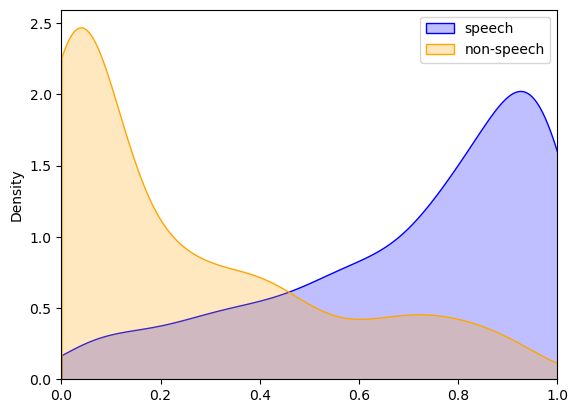

In [6]:
print("Reading baseline results...")
training = "baseline"
result_dir = Path(PICKLE_RESULTS, training)
all_paths = get_files_from_dir_with_pathlib(result_dir)

test_event_accuracy_result = []
ver_acc_result = []
ver_recall_result = []

val_acc_result = []
val_recall_result = []

auc_scores = []

gender_acc_result = []
gender_auc_scores = []


for pickle_path in get_files_from_dir_with_pathlib(result_dir):
    index = int(pickle_path.stem.split("_")[-1])
    if index in range(700, 710):
        result_dict = read_pickle(pickle_path)
        test_event_accuracy = result_dict['test_event_accuracy'] 

        ver_acc = result_dict['sd_acc'] 
        ver_recall = result_dict['sd_recall'] 
        val_acc = result_dict['sd_acc_val']
        val_recall = result_dict['sd_recall_val']

        ver_targets = result_dict['sd_targets']
        ver_probabilities = result_dict['sd_probs']

        gender_targets = result_dict['gender_ver_targets']
        gender_probabilities = result_dict['gender_ver_probs']
        gender_acc = result_dict['gender_ver_acc']

        epoch_train_loss_sec = result_dict["epoch_train_loss_sec"]
        epoch_val_loss_sec = result_dict["epoch_val_loss_sec"]

        if index==700:
            probability_histogram(ver_probabilities, ver_targets)

        # Plot ROC curve and save plot
        auc_score = roc_auc_score(ver_targets, ver_probabilities)
        
        test_event_accuracy_result.append(test_event_accuracy)
        ver_acc_result.append(ver_acc)
        ver_recall_result.append(ver_recall)
        val_acc_result.append(val_acc)
        val_recall_result.append(val_recall)
        auc_scores.append(auc_score)

        gender_auc_score = roc_auc_score(gender_targets, gender_probabilities)
        gender_auc_scores.append(gender_auc_score)
        gender_acc_result.append(gender_acc)

print(f"Mean SEC accuracy is {np.mean(test_event_accuracy_result):.2f} with std {np.std(test_event_accuracy_result):.2f}\n")

print(f"Mean SD accuracy is {np.mean(ver_acc_result):.2f} with std {np.std(ver_acc_result):.2f}")
print(f"Mean AUC score is {np.mean(auc_scores):.2f} with std {np.std(auc_scores):.2f} \n")

print(f"Mean GD accuracy is {np.mean(gender_acc_result):.2f} with std {np.std(gender_acc_result):.2f}")
print(f"Mean AUC score for GD is {np.mean(gender_auc_scores):.2f} with std {np.std(gender_auc_scores):.2f}")


Reading RDAL results

Reading RDAL results...
Mean SEC accuracy for P = 50 is 0.75 with std 0.01

Mean SD accuracy for P = 50 is 0.63 with std 0.02
Mean AUC score for P = 50 is 0.68 with std 0.02

Mean GD accuracy for P = 50 is 0.60 with std 0.03
Mean AUC score for GD for P = 50 is 0.64 with std 0.03


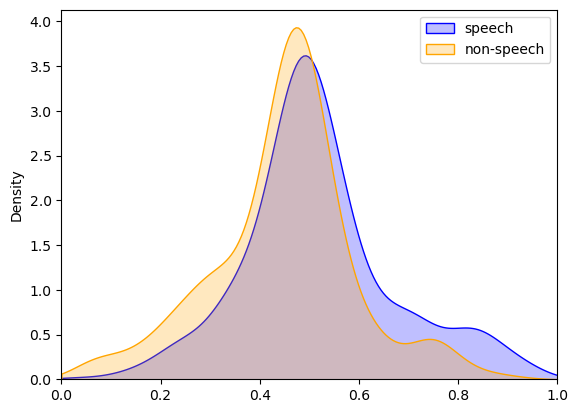

In [7]:
print("Reading RDAL results...")
training = "rdal"
result_dir = Path(PICKLE_RESULTS, training)

P_VALUES = [50] 

test_event_accuracy_result = {}
ver_acc_result = {}
ver_recall_result = {}

val_acc_result = {}
val_recall_result = {}
auc_scores = {}

gender_acc_result = {}
gender_auc_scores = {}


for pickle_path in get_files_from_dir_with_pathlib(result_dir):
    index = int(pickle_path.stem.split("_")[-1])
    if index in range (720, 730):
        result_dict = read_pickle(pickle_path)
        P = result_dict["P"]
        test_event_accuracy = result_dict['test_event_accuracy'] # Note 
        ver_acc = result_dict['ver_acc'] # Note 
        ver_recall = result_dict['ver_recall'] # Note
        val_acc = result_dict['ver_acc_val']
        val_recall = result_dict['ver_recall_val']

        ver_targets = result_dict['ver_targets']
        ver_probabilities = result_dict['ver_probabilities']

        gender_targets = result_dict['gender_ver_targets']
        gender_probabilities = result_dict['gender_ver_probs']
        gender_acc = result_dict['gender_ver_acc']


        epoch_train_loss_sec = result_dict["epoch_train_loss_sec"]
        epoch_train_loss_sd = result_dict["epoch_train_loss_sd"]

        epoch_train_loss_val = result_dict["epoch_val_loss_sec"]
        epoch_train_loss_sd_val = result_dict["epoch_val_loss_sd"]

        # Plot ROC curve and save plot
        auc_score = roc_auc_score(ver_targets, ver_probabilities)
        gender_auc_score = roc_auc_score(gender_targets, gender_probabilities)
    
        if index == 724:
            probability_histogram(ver_probabilities, ver_targets)

        if P not in test_event_accuracy_result:
            test_event_accuracy_result[P] = []
            ver_acc_result[P] = []
            ver_recall_result[P] = []
            val_acc_result[P] = []
            val_recall_result[P] = []
            auc_scores[P] = []

            gender_acc_result[P] = []
            gender_auc_scores[P] = []


        test_event_accuracy_result[P].append(test_event_accuracy)
        ver_acc_result[P].append(ver_acc)
        ver_recall_result[P].append(ver_recall)
        val_acc_result[P].append(val_acc)
        val_recall_result[P].append(val_recall)
        auc_scores[P].append(auc_score)

        gender_auc_scores[P].append(gender_auc_score)
        gender_acc_result[P].append(gender_acc)

for P in P_VALUES:
    print(f"Mean SEC accuracy for P = {P} is {np.mean(test_event_accuracy_result[P]):.2f} with std {np.std(test_event_accuracy_result[P]):.2f}\n")

    print(f"Mean SD accuracy for P = {P} is {np.mean(ver_acc_result[P]):.2f} with std {np.std(ver_acc_result[P]):.2f}")
    print(f"Mean AUC score for P = {P} is {np.mean(auc_scores[P]):.2f} with std {np.std(auc_scores[P]):.2f}\n")

    print(f"Mean GD accuracy for P = {P} is {np.mean(gender_acc_result[P]):.2f} with std {np.std(gender_acc_result[P]):.2f}")
    print(f"Mean AUC score for GD for P = {P} is {np.mean(gender_auc_scores[P]):.2f} with std {np.std(gender_auc_scores[P]):.2f}")


Reading NaiveAdv results

In [8]:
print("Reading NaiveAdv results...")
training = "naive_rdal"
result_dir = Path(PICKLE_RESULTS, training)

test_event_accuracy_result = []
ver_acc_result = []
ver_recall_result = []

val_acc_result = []
val_recall_result = []
auc_scores = []

gender_acc_result = []
gender_auc_scores = []


for pickle_path in get_files_from_dir_with_pathlib(result_dir):
    index = pickle_path.stem.split("_")[-1]
    if int(index) in range (710, 720):
        result_dict = read_pickle(pickle_path)
        test_event_accuracy = result_dict['test_event_accuracy'] 
        ver_acc = result_dict['ver_acc']
        ver_recall = result_dict['ver_recall']
        val_acc = result_dict['ver_acc_val']
        val_recall = result_dict['ver_recall_val']

        ver_targets = result_dict['ver_targets']
        ver_probabilities = result_dict['ver_probabilities']

        gender_targets = result_dict['gender_ver_targets']
        gender_probabilities = result_dict['gender_ver_probs']
        gender_acc = result_dict['gender_ver_acc']


        epoch_train_loss_sec = result_dict["epoch_train_loss_sec"]
        epoch_train_loss_sd = result_dict["epoch_train_loss_sd"]

        epoch_train_loss_val = result_dict["epoch_val_loss_sec"]
        epoch_train_loss_sd_val = result_dict["epoch_val_loss_sd"]

        # Plot ROC curve and save plot
        auc_score = roc_auc_score(ver_targets, ver_probabilities)
        gender_auc_score = roc_auc_score(gender_targets, gender_probabilities)

        test_event_accuracy_result.append(test_event_accuracy)
        ver_acc_result.append(ver_acc)
        ver_recall_result.append(ver_recall)
        val_acc_result.append(val_acc)
        val_recall_result.append(val_recall)
        auc_scores.append(auc_score)

        gender_auc_scores.append(gender_auc_score)
        gender_acc_result.append(gender_acc)

# print results
print(f"Mean SEC accuracy is {np.mean(test_event_accuracy_result):.2f} with std {np.std(test_event_accuracy_result):.2f}\n")

print(f"Mean SD accuracy is {np.mean(ver_acc_result):.2f} with std {np.std(ver_acc_result):.2f}")
print(f"Mean AUC score is {np.mean(auc_scores):.2f} with std {np.std(auc_scores):.2f}\n")

print(f"Mean GD accuracy is {np.mean(gender_acc_result):.2f} with std {np.std(gender_acc_result):.2f}")
print(f"Mean AUC score for GD is {np.mean(gender_auc_scores):.2f} with std {np.std(gender_auc_scores):.2f}")



Reading NaiveAdv results...
Mean SEC accuracy is 0.75 with std 0.01

Mean SD accuracy is 0.74 with std 0.02
Mean AUC score is 0.83 with std 0.02

Mean GD accuracy is 0.59 with std 0.04
Mean AUC score for GD is 0.63 with std 0.06


Plot ROC curve

Reading from  RDAL\best_pickle_results\1_rdal_mask_baseline.pickle
Reading from  RDAL\best_pickle_results\2_rdal_naive_rdal.pickle
Reading from  RDAL\best_pickle_results\3_rdal_rdal.pickle
Reading from  RDAL\best_pickle_results\4_rdal_mask_fixed_mask.pickle


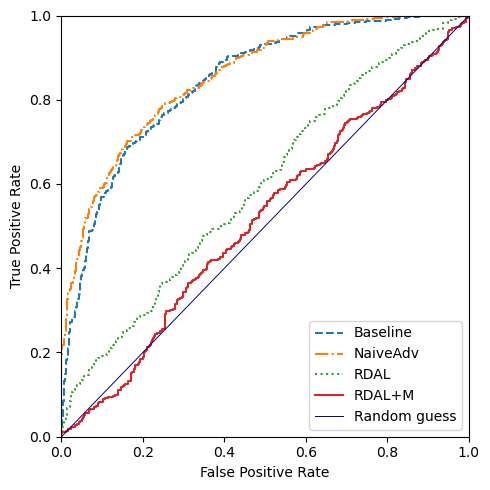

In [9]:
best_result_dir = Path("RDAL\\best_pickle_results")
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
linestyles = ['dashed', 'dashdot', 'dotted', 'solid']

i=0
for pickle_path in get_files_from_dir_with_pathlib(best_result_dir):
    index = pickle_path.stem.split("_")[-1]
    training = pickle_path.stem.split("_")[-3]
    result_dict = read_pickle(pickle_path)
    print("Reading from ", pickle_path)
    
    if 'sd_targets' in result_dict and 'sd_probs' in result_dict:
        ver_targets = result_dict['sd_targets']
        ver_probabilities = result_dict['sd_probs']

    elif 'ver_targets' in result_dict and 'ver_probabilities' in result_dict:
        ver_targets = result_dict['ver_targets']
        ver_probabilities = result_dict['ver_probabilities']

    # Plot ROC curve and save plot
    fpr, tpr, thresholds = roc_curve(ver_targets, ver_probabilities)
    auc_score = roc_auc_score(ver_targets, ver_probabilities)

    # Plot ROC curve and save plot
    ax.plot(fpr, tpr, linestyle=linestyles[i])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    i += 1

plt.tight_layout()
plt.plot([0, 1], [0, 1], color='navy', linestyle='solid', linewidth=0.7)
plt.legend(["Baseline", "NaiveAdv", "RDAL","RDAL+M", "Random guess"])
    
    